<a href="https://colab.research.google.com/github/Mizoroki-Heck/Forecasting-a-Time-Series-of-Real-Estate-Prices/blob/main/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
import seaborn as sns

### Считываем данные и обработка

In [ ]:
data = pd.read_excel('/content/sample_data/Средняя цена 1 кв. м общей площади квартир на рынке жилья.xls', skiprows=3)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [ ]:
data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,I квартал,II квартал,III квартал,IV квартал,I квартал.1,II квартал.1,III квартал.1,...,IV квартал.21,I квартал.22,II квартал.22,III квартал.22,IV квартал.22,I квартал.23,II квартал.23,III квартал.23,IV квартал.23,I квартал.24
0,Вторичный рынок жилья,Российская Федерация,Все типы квартир,5910.45,5955.02,6103.58,6590.17,7300.88,7723.86,8291.11,...,76686.26,89867.64,91637.43,92892.27,94362.82,90891.50,92363.00,94526.47,97418.39,108127.06
1,Вторичный рынок жилья,Российская Федерация,Квартиры среднего качества (типовые),5710.34,5791.35,5929.36,6421.56,6943.38,7391.32,7957.78,...,70513.74,83236.73,83985.15,85155.79,86770.32,85532.32,87084.49,88734.00,91593.07,98296.29
2,Вторичный рынок жилья,Российская Федерация,Низкого качества,4942.25,4930.57,5079.02,5482.66,6121.54,6357.71,6684.85,...,61353.55,71741.33,73576.96,72096.70,72265.28,72572.55,74282.35,76135.63,77719.26,84074.07
3,Вторичный рынок жилья,Российская Федерация,Улучшенного качества,6712.89,6704.89,6877.55,7422.19,8065.37,8480.71,9134.58,...,83011.86,97482.92,99908.63,101459.09,102928.68,100502.50,101951.86,105024.44,108246.66,117948.54
4,Вторичный рынок жилья,Российская Федерация,Элитные квартиры,11422.90,11393.16,11606.28,12009.49,13636.33,14192.89,14671.29,...,118912.23,146663.64,157717.52,161595.15,162842.36,133657.26,132641.54,135485.26,137342.62,212078.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,Первичный рынок жилья,Восточно-Сибирский район,Элитные квартиры,7048.55,7060.77,7307.24,9560.06,9829.22,11753.79,12758.47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
988,Первичный рынок жилья,Дальневосточный район,Все типы квартир,7203.56,7392.97,7434.40,7987.61,10614.19,11180.25,11995.19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
989,Первичный рынок жилья,Дальневосточный район,Квартиры среднего качества (типовые),5653.88,5653.88,6000.00,6299.25,6591.40,6991.40,6991.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
990,Первичный рынок жилья,Дальневосточный район,Улучшенного качества,6913.49,7036.90,6954.79,7457.41,9789.78,10418.40,11766.38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Поменяем названия кварталов на более понятные

In [ ]:
quarters = ['Q1',	'Q2',	'Q3',	'Q4']
years = [i for i in range(2000, 2025)]
combined = []

for i in range(24):
  y = years[i]
  for j in range(4):
    combined.append(f"{y}-{quarters[j]}")

combined.append('2024-Q1')

In [ ]:
combined = ['Тип квартиры'] + combined
combined = ['Территория'] + combined
combined = ['Тип рынка жилья'] + combined
data.columns = combined

Приведем таблицу к виду, где наша цена, будет одной колонкой

In [ ]:
df_melted = data.melt(id_vars=['Тип рынка жилья', 'Территория', 'Тип квартиры'], var_name='Квартал',value_name='Цена')
df_melted

,Тип рынка жилья,Территория,Тип квартиры,Квартал,Цена
0,Вторичный рынок жилья,Российская Федерация,Все типы квартир,2000-Q1,5910.45
1,Вторичный рынок жилья,Российская Федерация,Квартиры среднего качества (типовые),2000-Q1,5710.34
2,Вторичный рынок жилья,Российская Федерация,Низкого качества,2000-Q1,4942.25
3,Вторичный рынок жилья,Российская Федерация,Улучшенного качества,2000-Q1,6712.89
4,Вторичный рынок жилья,Российская Федерация,Элитные квартиры,2000-Q1,11422.90
...,...,...,...,...,...
96219,Первичный рынок жилья,Восточно-Сибирский район,Элитные квартиры,2024-Q1,NaN
96220,Первичный рынок жилья,Дальневосточный район,Все типы квартир,2024-Q1,NaN
96221,Первичный рынок жилья,Дальневосточный район,Квартиры среднего качества (типовые),2024-Q1,NaN
96222,Первичный рынок жилья,Дальневосточный район,Улучшенного качества,2024-Q1,NaN


В данных присутствует столбец южного фежерального округа поделенный на три столбца по разным датам это создает дополнительные Nan.
Например начиная с 2010 года в столбце 'Южный федеральный округ (по 2009 год)' идут Nan до 2024 года и по такой логике все остальные столбцы.

- 'Южный федеральный округ (по 2009 год)'      
- 'Южный федеральный округ (с 2010 года)'     
- 'Южный федеральный округ (с 29.07.2016)'
           
Попробуем их объединить

In [ ]:
# Сделаем дату индексом, тем самым приведем к виду временного ряда
df_melted['Квартал'] = pd.PeriodIndex(df_melted['Квартал'], freq='Q').to_timestamp()
df_melted = df_melted.set_index('Квартал')

#Удалим лишние пробелы из колонки территория
df_melted['Территория'] = df_melted['Территория'].str.strip()

Наглядный пример, посмотрим на данные ЮФО по 2009 года и с 2010, с элитным жильем, вторичного рынка

In [ ]:
df_melted.loc[(df_melted['Территория'] == 'Южный федеральный округ (по 2009 год)') & (df_melted['Тип квартиры'] == 'Элитные квартиры')]['2009-10-01':'2010-01-01']

,Тип рынка жилья,Территория,Тип квартиры,Цена
Квартал,,,,
2009-10-01,Вторичный рынок жилья,Южный федеральный округ (по 2009 год),Элитные квартиры,60454.91
2009-10-01,Первичный рынок жилья,Южный федеральный округ (по 2009 год),Элитные квартиры,49922.43
2010-01-01,Вторичный рынок жилья,Южный федеральный округ (по 2009 год),Элитные квартиры,NaN
2010-01-01,Первичный рынок жилья,Южный федеральный округ (по 2009 год),Элитные квартиры,NaN


In [ ]:
df_melted.loc[(df_melted['Территория'] == 'Южный федеральный округ (с 2010 года)') & (df_melted['Тип квартиры'] == 'Элитные квартиры')]['2009-10-01':'2010-01-01']

,Тип рынка жилья,Территория,Тип квартиры,Цена
Квартал,,,,
2009-10-01,Вторичный рынок жилья,Южный федеральный округ (с 2010 года),Элитные квартиры,NaN
2009-10-01,Первичный рынок жилья,Южный федеральный округ (с 2010 года),Элитные квартиры,NaN
2010-01-01,Вторичный рынок жилья,Южный федеральный округ (с 2010 года),Элитные квартиры,54775.90
2010-01-01,Первичный рынок жилья,Южный федеральный округ (с 2010 года),Элитные квартиры,43931.09


In [ ]:
df_melted.isna().sum()

,0
Тип рынка жилья,0
Территория,0
Тип квартиры,0
Цена,27335


Cделаем функцию, где мы будем проходить по всем комбинациям типов квартир и рынка жилья и заменять NaN соответствующими значениями других столбцов и запишем это в столбец с 2009 годом, остальные удалим

In [ ]:
def union_sfo(df):
  type_apartment = df['Тип квартиры'].unique()
  type_market = df['Тип рынка жилья'].unique()

  for i in type_apartment:
    for j in type_market:
      mask1 = (df['Территория'] == 'Южный федеральный округ (по 2009 год)') & (df['Тип квартиры'] == i) & (df['Тип рынка жилья'] == j)
      mask2 = (df['Территория'] == 'Южный федеральный округ (с 2010 года)') & (df['Тип квартиры'] == i) & (df['Тип рынка жилья'] == j)
      mask3 = (df['Территория'] == 'Южный федеральный округ (с 29.07.2016)') & (df['Тип квартиры'] == i) & (df['Тип рынка жилья'] == j)

      str1 = df[mask1]
      str2 = df[mask2]
      str3 = df[mask3]

      combined_df = str1.combine_first(str2.combine_first(str3))

      df.loc[mask1] = combined_df


In [ ]:
union_sfo(df_melted)
df_melted.isna().sum()

,0
Тип рынка жилья,0
Территория,0
Тип квартиры,0
Цена,26822


In [ ]:
df_melted.loc[(df_melted['Территория'] == 'Южный федеральный округ (по 2009 год)') & (df_melted['Тип квартиры'] == 'Элитные квартиры')]['2009-10-01':'2010-01-01']

,Тип рынка жилья,Территория,Тип квартиры,Цена
Квартал,,,,
2009-10-01,Вторичный рынок жилья,Южный федеральный округ (по 2009 год),Элитные квартиры,60454.91
2009-10-01,Первичный рынок жилья,Южный федеральный округ (по 2009 год),Элитные квартиры,49922.43
2010-01-01,Вторичный рынок жилья,Южный федеральный округ (по 2009 год),Элитные квартиры,54775.90
2010-01-01,Первичный рынок жилья,Южный федеральный округ (по 2009 год),Элитные квартиры,43931.09


In [ ]:
#Удаляем столбцы ЮФО 2010 и 2016 года.
df_melted = df_melted[~df_melted['Территория'].isin(['Южный федеральный округ (с 2010 года)', 'Южный федеральный округ (с 29.07.2016)'])]

Посмотрим на пропуски по типам рынка жилья

In [ ]:
missing_values_by_region_and_market = df_melted.groupby(['Квартал', 'Территория', 'Тип рынка жилья', 'Тип квартиры'])['Цена'].apply(lambda x: x.isnull().sum())
missing_values_by_region_and_market = missing_values_by_region_and_market.reset_index()
missing_values_by_region_and_market.sort_values(by='Цена', ascending=False)

,Квартал,Территория,Тип рынка жилья,Тип квартиры,Цена
29790,2007-10-01,Дальневосточный федеральный округ,Вторичный рынок жилья,Квартиры среднего качества (типовые),2
71861,2018-10-01,Дальневосточный федеральный округ,Первичный рынок жилья,Элитные квартиры,2
68993,2018-01-01,Дальневосточный федеральный округ,Первичный рынок жилья,Элитные квартиры,2
69949,2018-04-01,Дальневосточный федеральный округ,Первичный рынок жилья,Элитные квартиры,2
30370,2007-10-01,Сибирский федеральный округ,Вторичный рынок жилья,Квартиры среднего качества (типовые),2
...,...,...,...,...,...
35595,2009-04-01,Калужская область,Вторичный рынок жилья,Низкого качества,0
35594,2009-04-01,Калужская область,Вторичный рынок жилья,Квартиры среднего качества (типовые),0
35593,2009-04-01,Калужская область,Вторичный рынок жилья,Все типы квартир,0
35592,2009-04-01,Калининградская область,Первичный рынок жилья,Элитные квартиры,0


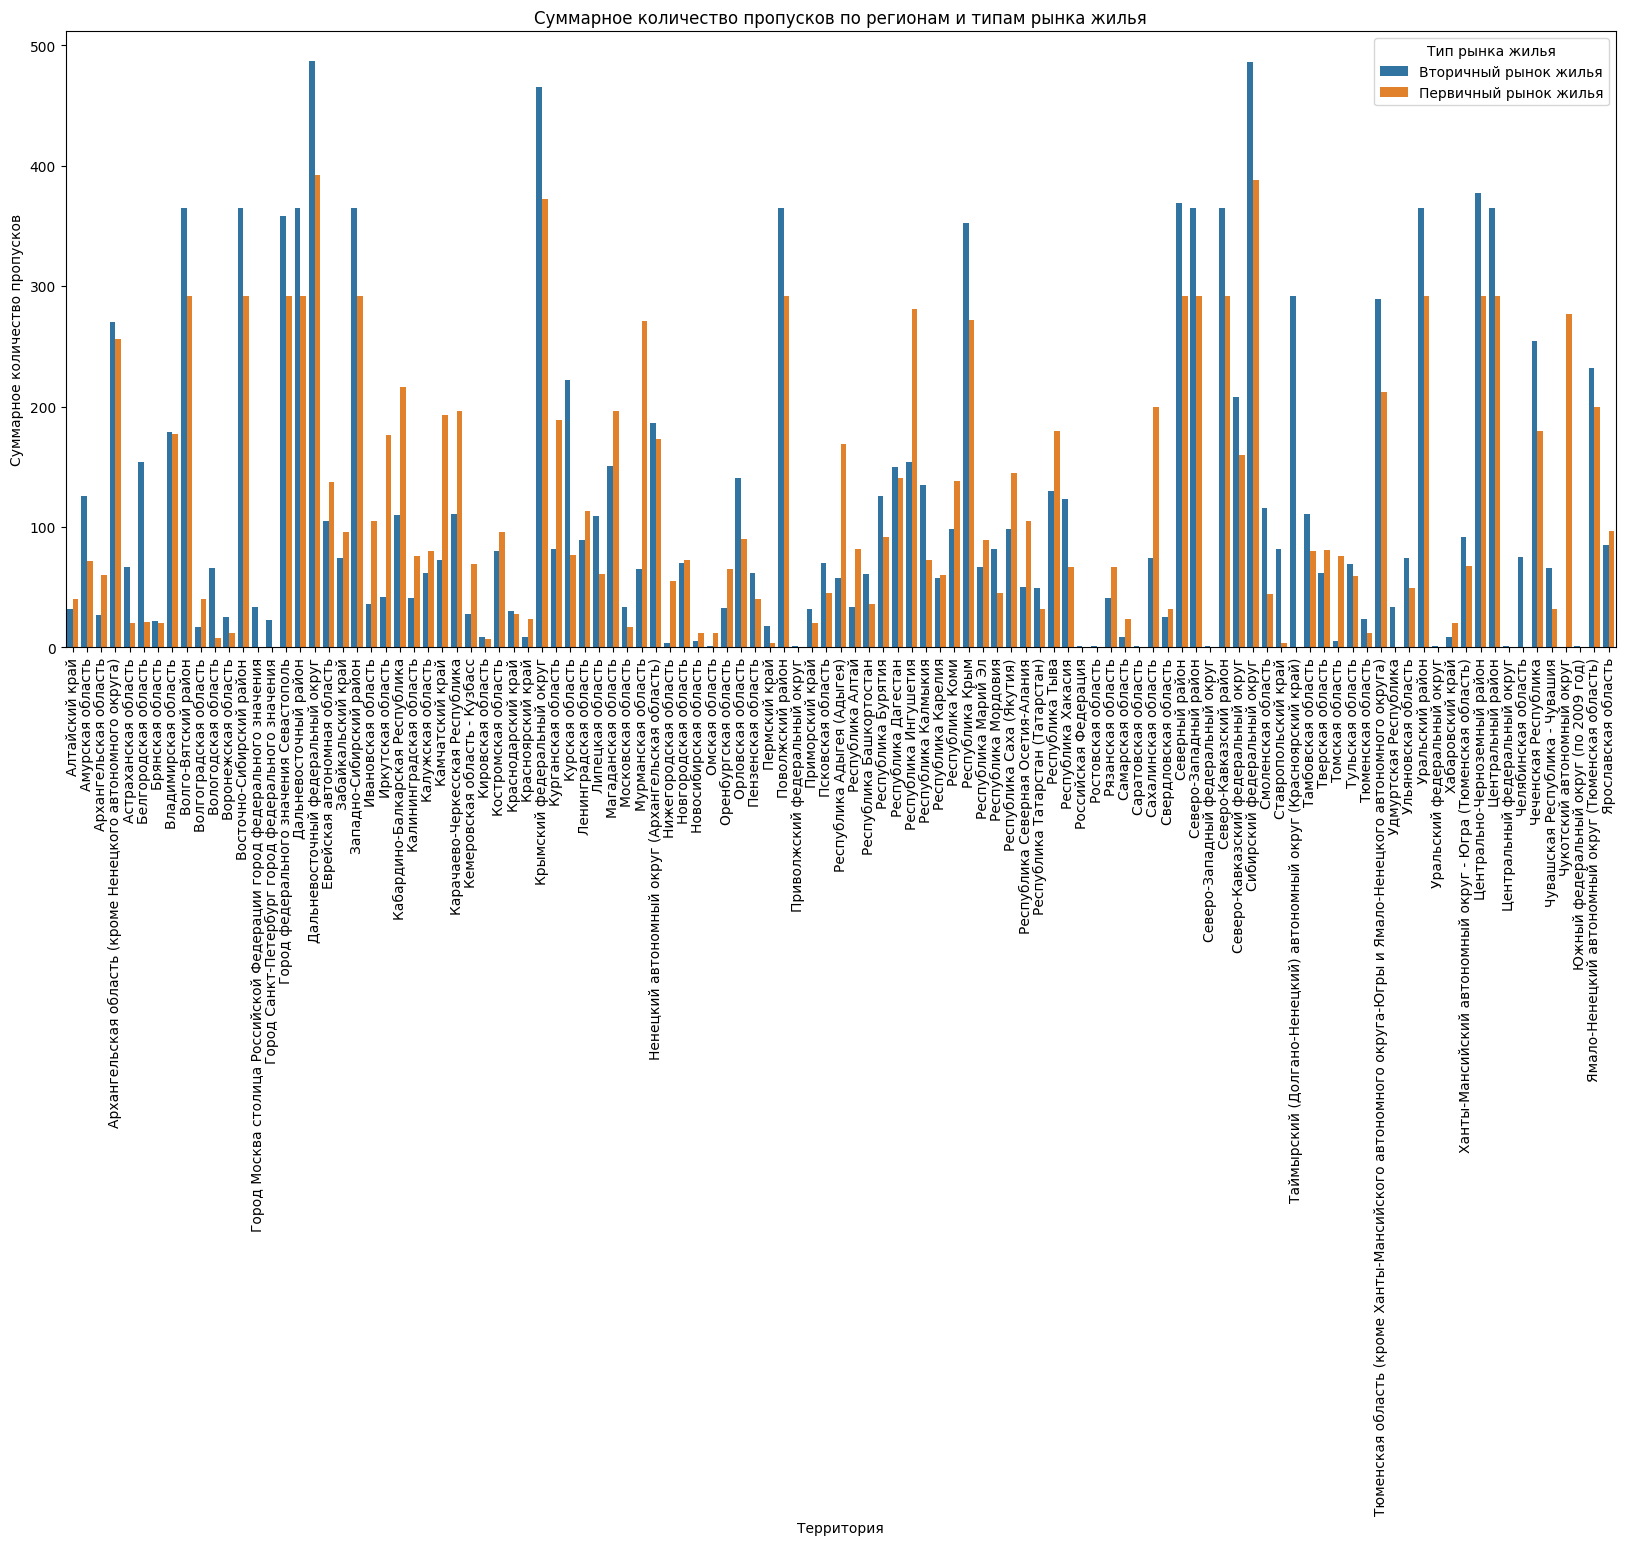

In [ ]:
summary_by_region_market = missing_values_by_region_and_market.groupby(['Территория', 'Тип рынка жилья'])['Цена'].sum().reset_index()

# Визуализируем
plt.figure(figsize=(20, 8))
sns.barplot(data=summary_by_region_market, x='Территория', y='Цена', hue=('Тип рынка жилья'))
plt.xticks(rotation=90)
plt.title('Суммарное количество пропусков по регионам и типам рынка жилья')
plt.xlabel('Территория')
plt.ylabel('Суммарное количество пропусков')
plt.show()

В исходных данных можно заметить, что три региона имеют наибольшее количество пропусков. Это связано с тем, что эти регионы были дублированы по типам рынка, что привело к различному содержимому данных.         
      ***(Ниже покажу разницу в размерах колонок продублированных и не продублированных)***

Например, в данных по вторичному рынку жилья для "Дальневосточного федерального округа" существуют две колонки. В первой колонке данные представлены до 1 квартала 2019 года, но начиная с 2019 года наблюдаются пропуски. Во второй колонке, наоборот, пропуски имеются только за 1 квартал 2019 года, а данные доступны для последующих периодов.

**В таком случае, думаю будет уместно просто удалить пропущенные значения в этих колонках т.к после преобразований нашей таблицы, у нас имеется одна колонка региона, и имеются все данные из дублированных колонок**

Закодируем категориальные переменные

In [ ]:
df_melted

In [ ]:
# df_melted = pd.get_dummies(df_melted, prefix=['Тип рынка жилья', 'Территория', 'Тип квартиры'])
# df_melted.replace({False: 0, True: 1}, inplace=True)

# # Уберем лишние слова в названиях
# df_melted.columns = df_melted.columns.str.replace('Территория_', '')
# df_melted.columns = df_melted.columns.str.replace('Тип рынка жилья_', '')
# df_melted.columns = df_melted.columns.str.replace('Тип квартиры_', '')
# df_melted.columns = df_melted.columns.str.strip()

# df_melted.rename(columns = {'Южный федеральный округ (по 2009 год)':'Южный федеральный округ'}, inplace = True )